In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv("../cleaned/cleaned_restaurant_data.csv")
df.head()

,restaurant_name,city,locality,cuisines,average_cost_for_two,currency,has_table_booking,has_online_delivery,price_range,aggregate_rating,rating_text,votes,country
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,3,4.8,Excellent,314,Phillipines
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,3,4.5,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,4,4.4,Very Good,270,Phillipines
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,4,4.9,Excellent,365,Phillipines
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,4,4.8,Excellent,229,Phillipines


## Which countries have the highest number of restaurants listed on Zomato?

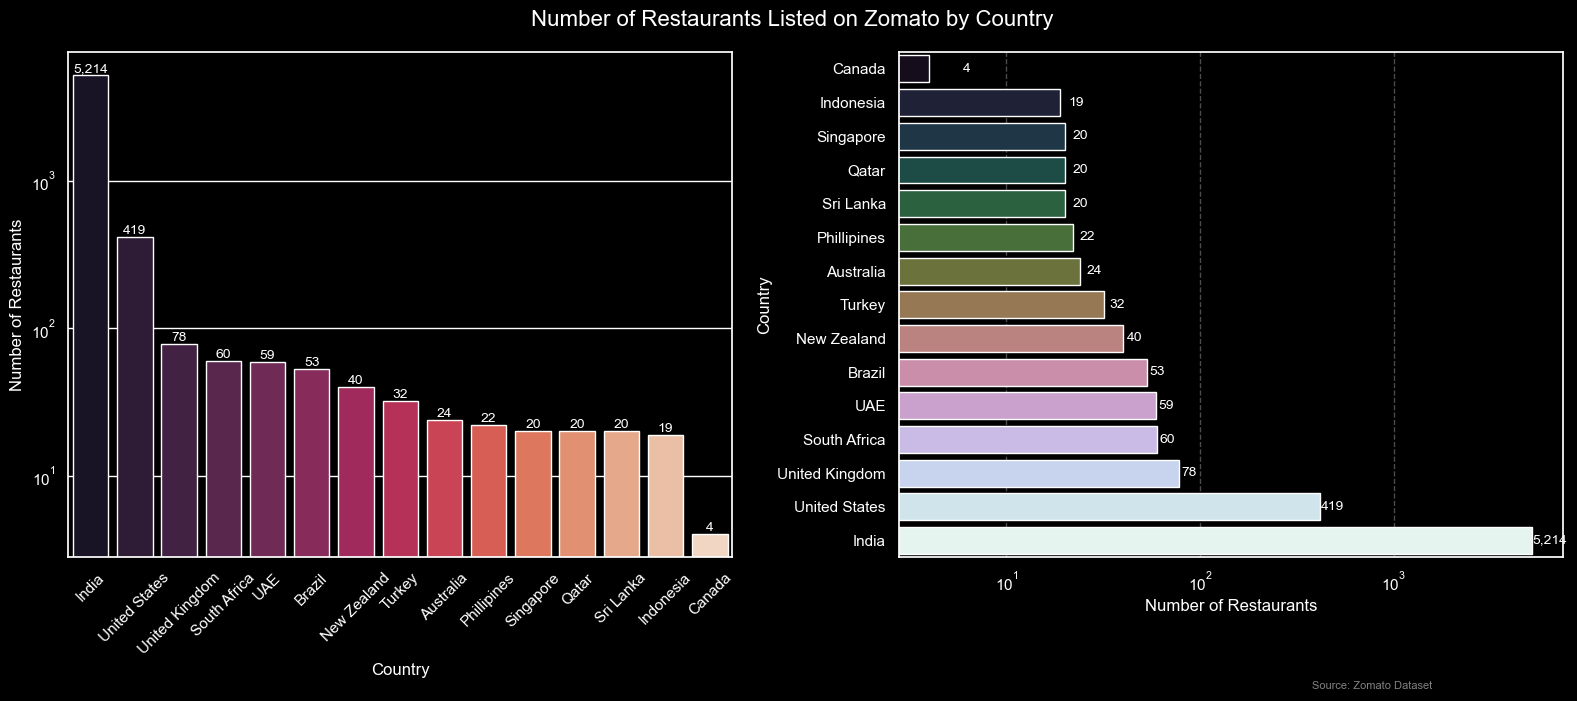

In [35]:
# Number of restaurants per country
country_counts = df["country"].value_counts()

fig, axs =plt.subplots(1, 2, figsize=(16, 7))

plt.sca(axs[0])
sns.set(style="darkgrid")
ax1  = sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette="rocket")
plt.yscale("log")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xticks(rotation=45)
for i, val in enumerate(country_counts.values):
    ax1.text(i, val, f"{val:,}", ha="center", va="bottom", fontsize=10, color="white")


plt.sca(axs[1])
sns.set(style="whitegrid")
plt.style.use("dark_background")
country_counts_sorted = df["country"].value_counts().sort_values(ascending=True)
ax2 = sns.barplot(x=country_counts_sorted.values, y=country_counts_sorted.index, hue=country_counts_sorted.index,
                 palette="cubehelix",dodge=False, legend=False)
plt.xscale("log")
plt.ylabel("Country", fontsize=12)
plt.xlabel("Number of Restaurants", fontsize=12)
plt.grid(True, axis="x", linestyle="--", alpha=0.3)
for i, val in enumerate(country_counts_sorted.values):
    ax2.text(val+2, i, f"{val:,}", va="center", ha="left", fontsize=10, color="white")

plt.subplots_adjust(wspace=0.4)
plt.suptitle("Number of Restaurants Listed on Zomato by Country", fontsize=16)
plt.figtext(0.9, 0.01, "Source: Zomato Dataset", ha="right", fontsize=8, color="gray")

plt.savefig("../visuals/zomato_restaurants_by_country.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

### Insights:
- India has the highest number of restaurants listed on Zomato (5214), far more than any other country.
- The next highest countries are the United States (419) and United Kingdom (78).
- This shows that Zomato has a strong presence in India, indicating a large market share and usage in that region.

## What is the average rating given by users across different countries ?

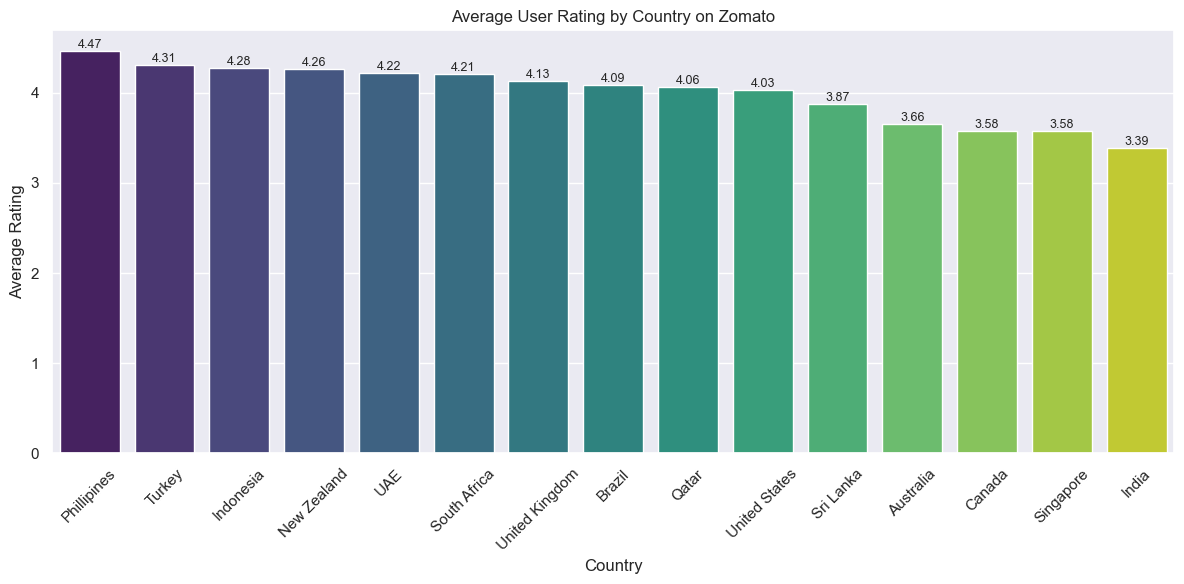

In [57]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

avg_ratings = df.groupby("country")["aggregate_rating"].mean().sort_values(ascending=False)

ax = sns.barplot(x=avg_ratings.index, y=avg_ratings.values, hue=avg_ratings.index, palette="viridis")
plt.title("Average User Rating by Country on Zomato")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
for i, val in enumerate(avg_ratings.values):
    ax.text(i, val, f"{val:.2f}", ha="center", va="bottom", fontsize=9)
plt.savefig("../visuals/average_rating_by_country.png", dpi=300, bbox_inches="tight")
plt.show()

### Insights:
- The Phillipines has the highest average rating (4.47), followed by Turkey (4.31) and Indonesia (4.28).
- India, despite having the most restaurants, has the lowest average rating (3.39).
- This may suggest customer satisfaction is lower in India or more users are providing critical feedback.

## Which Country support online delivery the most? 

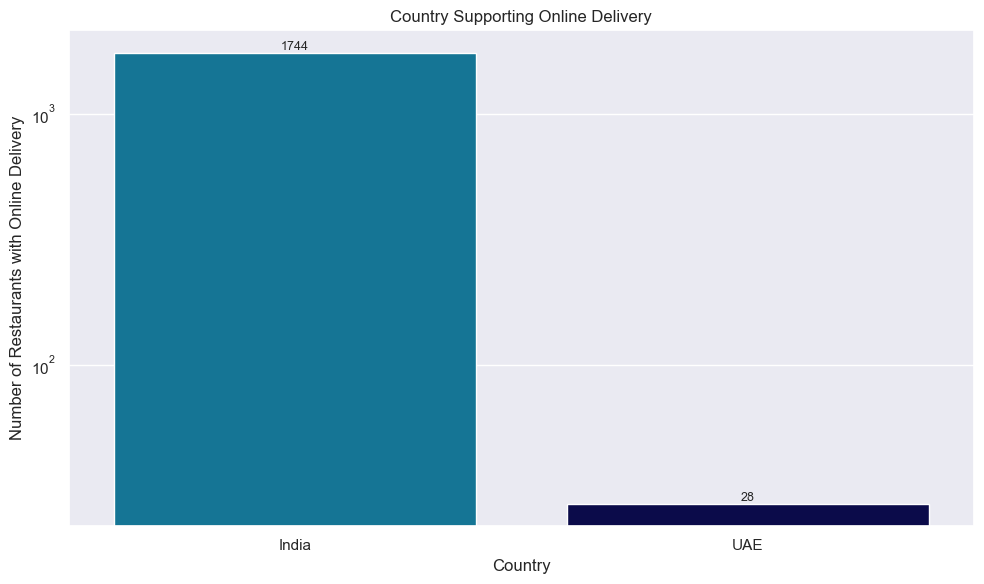

In [76]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

online_delivery = df[df["has_online_delivery"] == "Yes"]
# print(df["has_online_delivery"].dtype)
# print(df["has_online_delivery"].unique())
# print(df["has_online_delivery"].value_counts())
country_online_delivery = online_delivery["country"].value_counts()

ax = sns.barplot(x=country_online_delivery.index, y=country_online_delivery.values, hue=country_online_delivery.index, palette="ocean_r")
plt.yscale("log")
plt.title("Country Supporting Online Delivery")
plt.xlabel("Country")
plt.ylabel("Number of Restaurants with Online Delivery", fontsize=12)
for i, val in enumerate(country_online_delivery.values):
    ax.text(i, val, str(val), ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.savefig("../visuals/country_supports_online_delivery.png", dpi=300, bbox_inches="tight")
plt.show() 

### Insights:
- India has the most restaurants supporting online delivery (1744), showing strong digital food service adoption.
- UAE is the only other country shown, with just 28 restaurants, suggesting limited online delivery usage in other countries in this dataset.

## What is the average cost for two across countries?

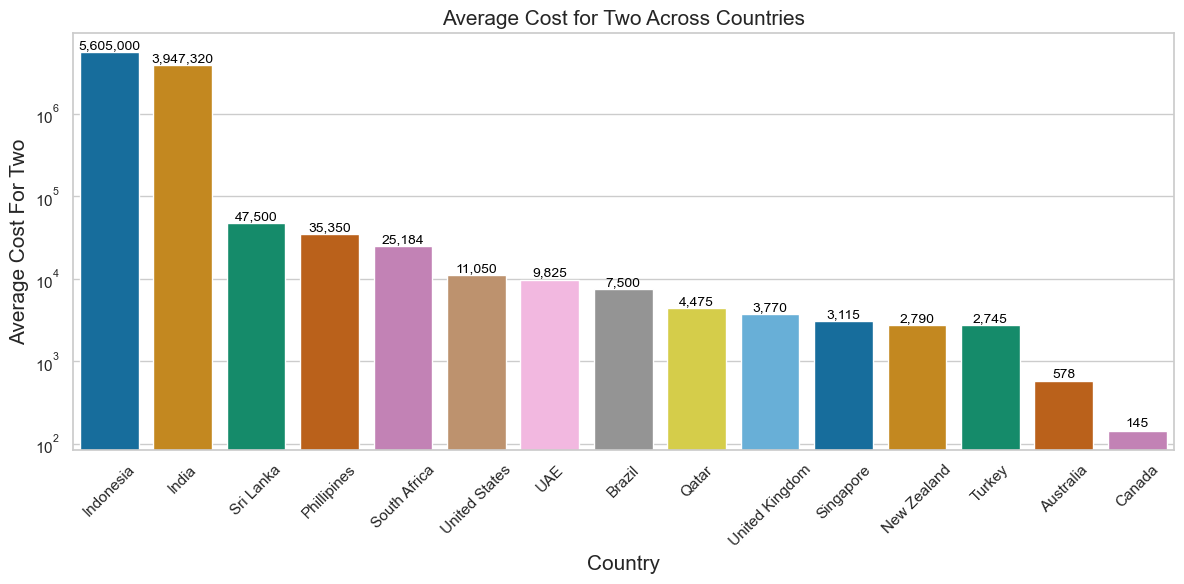

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

avg_cost  = df.groupby("country")["average_cost_for_two"].sum().sort_values(ascending=False)

ax = sns.barplot(x=avg_cost.index, y=avg_cost.values, hue=avg_cost.index, palette="colorblind")
plt.yscale("log")
plt.title("Average Cost for Two Across Countries", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Average Cost For Two", fontsize=15)
plt.xticks(rotation=45)
for i, val in enumerate(avg_cost.values):
    ax.text(i, val+1, f"{val:,}", ha="center", va="bottom", fontsize=10, color="black")
plt.tight_layout()
plt.savefig("../visuals/average_cost_for_two_across_countries", dpi=300, bbox_inches="tight")
plt.show()

### Insights:
- Indonesia and India have the highest "average cost for two", but the values are likely in local currency(IDR, INR), so not directly comparable.
- Countries like Canada (145) and Australia (578) have lower costs in their respective currencies.
- This reflects varying economic conditions and currency values across countries. 

## Summary of Key Insights
- India leads in restaurants listing and online delivery support on Zomato.
- The Phillipines and Turkey show the highest customer satisfaction based on ratings.
- Cost comparisons highlight economic diversity across countries.
- The dataset reflects Zomato's strong regional presence in India and digital service trends.